In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv("gurgaon_properties_cleaned_v2.csv").drop_duplicates()

In [4]:
df.sample(5)

,sector,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,SuperBuiltUpArea,builtUpArea,carpetArea,others,pooja room,servant room,store room,study room,furnishing_type,luxury_score
689,sector 79,flat,m3m golf hills,1.45,10211.0,1420.04,Carpet area: 1420 (131.92 sq.m.),2.0,2.0,3,15.0,NaN,Under Construction,NaN,NaN,1420.0,0,0,0,0,0,0,67
2481,sector 84,flat,spaze privy at,1.24,6465.0,1918.02,Super Built up area 1918(178.19 sq.m.)Built Up...,3.0,3.0,3,8.0,North-East,Relatively New,1918.0,1650.0,1550.0,0,0,0,0,1,2,158
2110,sector 81,flat,bestech park view ananda,0.95,6985.0,1360.06,Super Built up area 1360(126.35 sq.m.)Built Up...,2.0,2.0,2,13.0,South-East,Relatively New,1360.0,1150.0,894.0,0,0,0,0,0,2,167
1485,sector 81,flat,dlf the ultima,2.25,10553.0,2132.10,Super Built up area 2132(198.07 sq.m.),3.0,3.0,3+,15.0,North-East,Relatively New,2132.0,NaN,NaN,0,0,1,0,0,1,165
2542,sector 9,house,independent,0.60,10753.0,558.00,Plot area 62(51.84 sq.m.),2.0,2.0,1.0,1.0,North-East,Moderately Old,NaN,558.0,NaN,0,0,0,0,0,0,8


In [5]:
df.shape

(3726, 23)

# Price

<Axes: xlabel='price', ylabel='Count'>

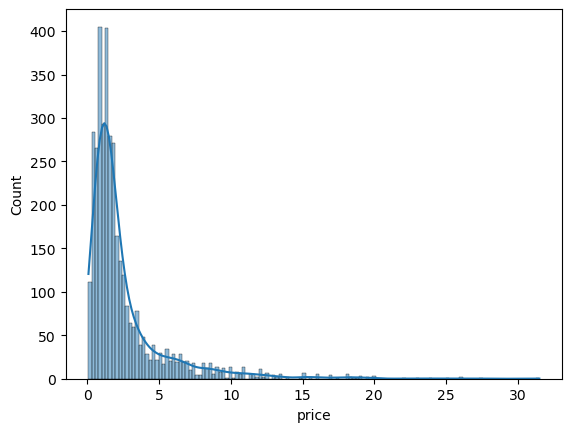

In [7]:
sns.histplot(df['price'], kde=True)

<Axes: xlabel='price'>

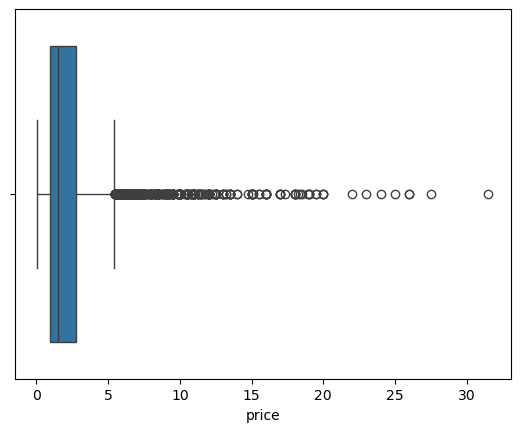

In [8]:
sns.boxplot(x=df['price'])

In [9]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR

In [10]:
outliers_price = df[(df['price'] > upper_bound) | (df['price'] < lower_bound)]

In [11]:
outliers_price['price']

1        6.10
42       8.00
52      10.50
62       5.88
63       8.00
        ...  
3829     5.50
3830     7.80
3842     6.75
3849     9.00
3859     8.50
Name: price, Length: 427, dtype: float64

In [12]:
outliers_price.shape

(427, 23)

In [13]:
outliers_price['price'].describe()

count    427.000000
mean       9.227963
std        4.066584
min        5.460000
25%        6.450000
50%        8.000000
75%       10.655000
max       31.500000
Name: price, dtype: float64

In [14]:
outliers_price['price'].describe()

count    427.000000
mean       9.227963
std        4.066584
min        5.460000
25%        6.450000
50%        8.000000
75%       10.655000
max       31.500000
Name: price, dtype: float64

In [15]:
outliers_price.sort_values('price', ascending=False).to_excel('outliers_price.xlsx')

# Price per sqft

<Axes: xlabel='price_per_sqft', ylabel='Count'>

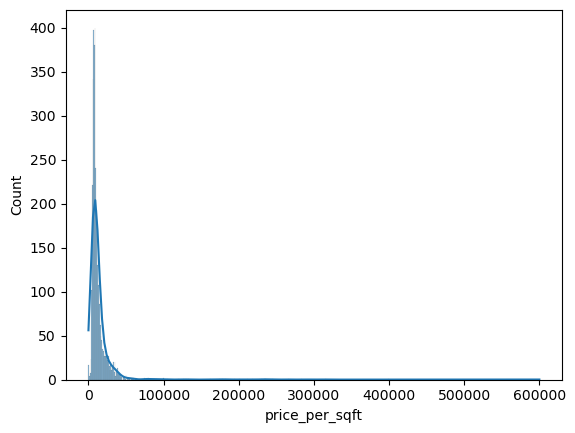

In [17]:
sns.histplot(df['price_per_sqft'], kde=True)

<Axes: xlabel='price_per_sqft'>

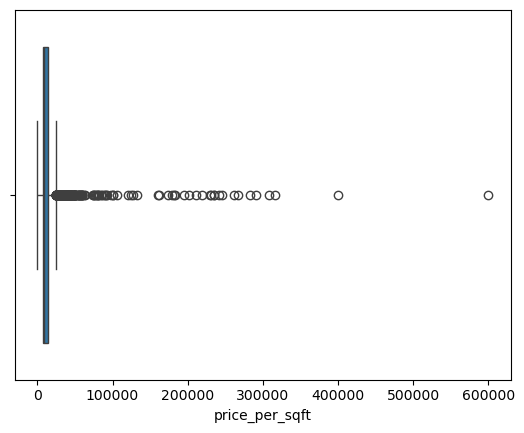

In [18]:
sns.boxplot(x=df['price_per_sqft'])

In [19]:
df['price_per_sqft'].describe()

count      3689.000000
mean      13882.194091
std       23085.323373
min           4.000000
25%        6812.000000
50%        9011.000000
75%       13878.000000
max      600000.000000
Name: price_per_sqft, dtype: float64

In [20]:
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR

In [21]:
outliers_price_per_sqft = df[(df['price_per_sqft'] > upper_bound) | (df['price_per_sqft'] < lower_bound)]

In [22]:
outliers_price_per_sqft.describe()

,price,price_per_sqft,area,bedRoom,bathroom,floorNum,SuperBuiltUpArea,builtUpArea,carpetArea,others,pooja room,servant room,store room,study room,furnishing_type,luxury_score
count,357.000000,357.000000,357.000000,357.000000,357.000000,349.000000,12.000000,327.000000,73.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,8.023361,52516.361345,2250.239132,6.022409,6.050420,3.352436,2684.416667,2249.446483,1336.698630,0.134454,0.439776,0.602241,0.271709,0.366947,0.991597,61.053221
std,5.184287,60676.272528,1560.340415,3.548152,3.702069,3.501088,739.527916,1876.916974,1784.152668,0.341618,0.497056,0.490122,0.445465,0.482648,0.940617,48.904056
min,0.300000,24489.000000,50.000000,1.000000,1.000000,0.000000,1875.000000,30.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.350000,28233.000000,1242.000000,4.000000,4.000000,2.000000,2108.250000,540.000000,200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000
50%,7.250000,33592.000000,2160.000000,5.000000,5.000000,3.000000,2577.000000,1935.000000,435.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,49.000000
75%,10.850000,42054.000000,3240.000000,7.000000,7.000000,4.000000,2985.750000,3240.000000,1650.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,97.000000
max,31.500000,600000.000000,9000.000000,21.000000,21.000000,41.000000,4072.000000,9500.000000,9000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,174.000000


In [23]:
outliers_price_per_sqft['price_per_sqft'].describe()

count       357.000000
mean      52516.361345
std       60676.272528
min       24489.000000
25%       28233.000000
50%       33592.000000
75%       42054.000000
max      600000.000000
Name: price_per_sqft, dtype: float64

In [24]:
outliers_price_per_sqft.sort_values('price_per_sqft', ascending=False).to_excel('outliers_price_per_sqft.xlsx')

In [25]:
outliers_price_per_sqft['area'] = outliers_price_per_sqft['area'].apply(lambda x: x*9 if x < 1000 else x)

/var/folders/xh/dlr59jp10wj5hx57q_rhfy3c0000gn/T/ipykernel_64828/3237291065.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_price_per_sqft['area'] = outliers_price_per_sqft['area'].apply(lambda x: x*9 if x < 1000 else x)


In [26]:
outliers_price_per_sqft['price_per_sqft'] = round((outliers_price_per_sqft['price']*10000000) / outliers_price_per_sqft['area'])

/var/folders/xh/dlr59jp10wj5hx57q_rhfy3c0000gn/T/ipykernel_64828/2041768887.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_price_per_sqft['price_per_sqft'] = round((outliers_price_per_sqft['price']*10000000) / outliers_price_per_sqft['area'])


In [27]:
outliers_price_per_sqft['price_per_sqft'].describe()

count      357.000000
mean     29240.330532
std      12472.257952
min       2723.000000
25%      25556.000000
50%      29861.000000
75%      35556.000000
max      82540.000000
Name: price_per_sqft, dtype: float64

In [28]:
df.update(outliers_price_per_sqft)

<Axes: xlabel='price_per_sqft', ylabel='Count'>

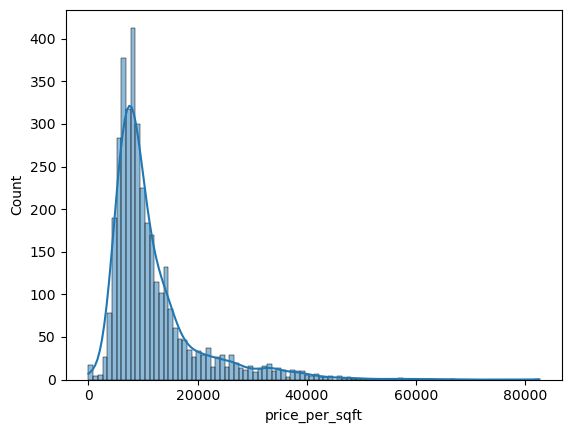

In [29]:
sns.histplot(df['price_per_sqft'], kde=True)

<Axes: xlabel='price_per_sqft'>

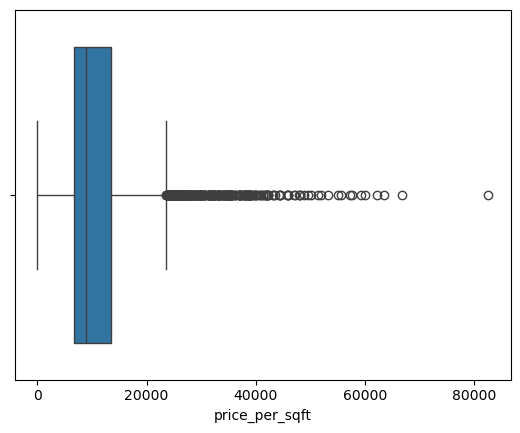

In [30]:
sns.boxplot(x=df['price_per_sqft'])

In [31]:
df[df['price_per_sqft'] > 50000]

,sector,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,SuperBuiltUpArea,builtUpArea,carpetArea,others,pooja room,servant room,store room,study room,furnishing_type,luxury_score
984,sector 47,house,malibu towne,8.50,53125.0,1600.00,Built Up area: 1600 (148.64 sq.m.),12.0,12.0,3+,4.0,North,New Property,NaN,1600.0,NaN,0,0,0,0,0,2,99
1177,dlf phase,house,independent,26.00,82540.0,3150.00,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16.0,16.0,3+,4.0,North-West,New Property,NaN,400.0,350.0,0,1,1,1,1,2,72
1231,sector 70,flat,unitech vistas,9.00,57507.0,1565.03,Built Up area: 1565 (145.39 sq.m.),3.0,3.0,0,7.0,NaN,Undefined,NaN,1565.0,NaN,0,0,0,0,0,0,0
1519,dlf phase,house,independent,14.75,51864.0,2844.00,Plot area 316(264.22 sq.m.),16.0,20.0,3+,4.0,East,New Property,NaN,2844.0,NaN,0,1,1,1,1,2,153
1742,sector 66,house,emaar mgf marbella,18.00,55556.0,3240.00,Plot area 360(301.01 sq.m.),4.0,4.0,3+,3.0,East,Moderately Old,NaN,3240.0,NaN,0,1,1,0,1,1,75
1888,sector 54,house,emaar the palm springs,24.00,66667.0,3600.00,Plot area 400(37.16 sq.m.),5.0,5.0,2.0,1.0,North-East,Old Property,NaN,400.0,NaN,0,1,1,0,1,2,122
2124,sector 31,house,project housing board colony,8.00,63492.0,1260.00,Built Up area: 140 (117.06 sq.m.),2.0,1.0,0,1.0,NaN,Undefined,NaN,140.0,NaN,0,0,0,0,0,0,0
2524,dlf phase,house,dlf city plots,26.00,57206.0,4545.00,Plot area 505(422.24 sq.m.),6.0,7.0,3+,2.0,North-East,New Property,NaN,4545.0,NaN,1,1,1,0,1,2,138
2665,sohna road road,house,cloudnine cottages,5.50,55000.0,1000.00,Plot area 1000(92.9 sq.m.),3.0,3.0,0,1.0,NaN,Moderately Old,NaN,1000.0,NaN,0,0,0,0,0,0,0
2756,sector 54,house,emaar the palm springs,14.00,62222.0,2250.00,Plot area 250(209.03 sq.m.),4.0,5.0,3+,2.0,North,Old Property,NaN,2250.0,NaN,0,0,1,0,1,2,160


In [32]:
len(df[df['price_per_sqft'] > 50000])

13

In [33]:
df = df[df['price_per_sqft'] <= 50000]

<Axes: xlabel='price_per_sqft'>

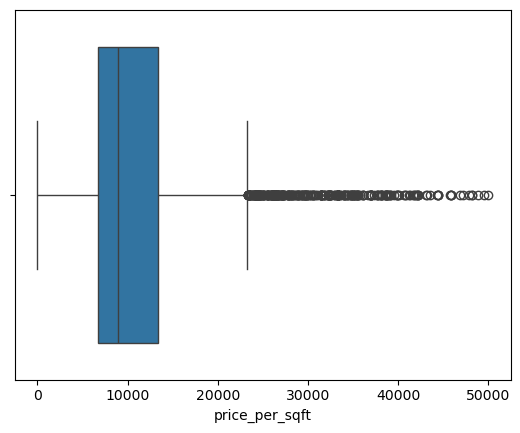

In [34]:
sns.boxplot(x=df['price_per_sqft'])

# Area

<Axes: xlabel='area', ylabel='Count'>

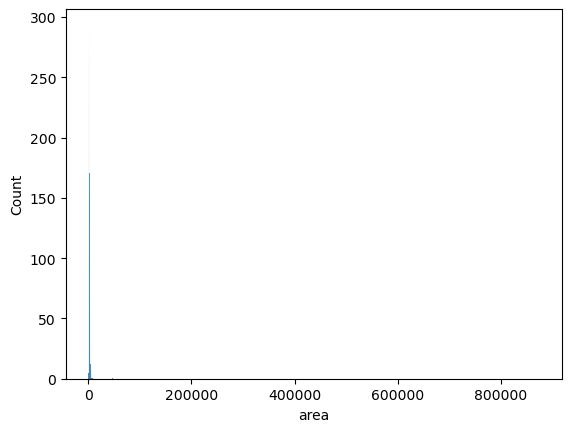

In [36]:
sns.histplot(df['area'])

<Axes: xlabel='area'>

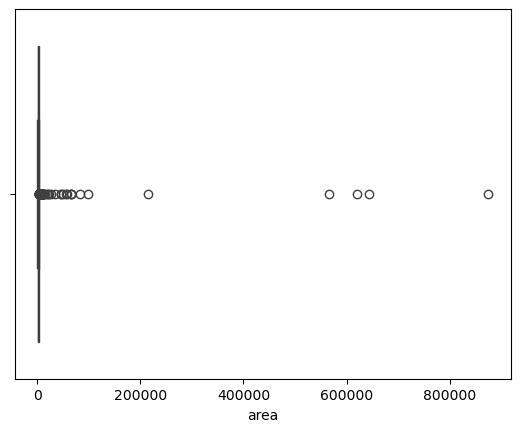

In [37]:
sns.boxplot(x=df['area'])

In [38]:
df['area'].describe()

count      3676.000000
mean       2941.904535
std       23120.076156
min         145.000000
25%        1259.692500
50%        1749.455000
75%        2343.340000
max      875000.000000
Name: area, dtype: float64

In [39]:
Q1 = df['area'].quantile(0.25)
Q3 = df['area'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR

In [40]:
outliers_area = df[(df['area'] > upper_bound) | (df['area'] < lower_bound)]

In [41]:
outliers_area

,sector,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,SuperBuiltUpArea,builtUpArea,carpetArea,others,pooja room,servant room,store room,study room,furnishing_type,luxury_score
22,sushant lok,house,independent,2.50,2885.0,8667.00,Plot area 107(89.47 sq.m.),7.0,7.0,3.0,4.0,West,Relatively New,NaN,963.0,NaN,1,0,0,0,0,2,20
26,sector 48,flat,central park 2 bellevue,5.00,11627.0,4300.34,Carpet area: 4300 (399.48 sq.m.),3.0,4.0,3,14.0,North-East,Moderately Old,NaN,NaN,4300.0,0,0,0,0,0,0,82
66,sector 110,flat,indiabulls enigma,4.00,9851.0,4060.50,Built Up area: 3350 (311.23 sq.m.),4.0,4.0,3,17.0,NaN,New Property,NaN,3350.0,NaN,0,0,0,0,0,0,59
71,sector 95,flat,ramsons kshitij,0.24,53.0,45283.02,Carpet area: 45966 (4270.38 sq.m.),2.0,2.0,1,10.0,North-West,Relatively New,NaN,NaN,45966.0,1,0,0,0,0,0,33
77,sector 33,house,unitech uniworld resorts,8.00,17778.0,4499.90,Built Up area: 500 (418.06 sq.m.),6.0,5.0,3+,4.0,NaN,Undefined,NaN,500.0,NaN,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3748,sector 112,flat,experion windchants,5.20,10726.0,4848.03,Super Built up area 4848(450.39 sq.m.)Built Up...,4.0,6.0,3+,15.0,East,Relatively New,4848.0,3655.0,3500.0,0,1,1,0,0,2,174
3757,sector 65,flat,m3m golfestate,13.20,12000.0,11000.00,Carpet area: 11000 (1021.93 sq.m.),4.0,4.0,3,13.0,North,Moderately Old,NaN,NaN,11000.0,0,0,1,0,0,0,60
3758,dlf phase,house,dlf city plots,13.50,29880.0,4518.10,Plot area 502(419.74 sq.m.),5.0,5.0,2.0,2.0,East,Moderately Old,NaN,4518.0,NaN,1,0,1,0,1,2,104
3815,new palam,flat,ompee k s residency,1.60,2993.0,5346.00,Carpet area: 66 (55.18 sq.m.),2.0,2.0,2,1.0,NaN,Relatively New,NaN,NaN,66.0,0,0,0,0,0,0,0


In [42]:
outliers_area['area'].describe()

count       237.000000
mean      20646.558059
std       89325.684801
min        3980.050000
25%        4500.300000
50%        5018.500000
75%        6926.020000
max      875000.000000
Name: area, dtype: float64

In [43]:
df = df[df['area'] < 100000]

<Axes: xlabel='area'>

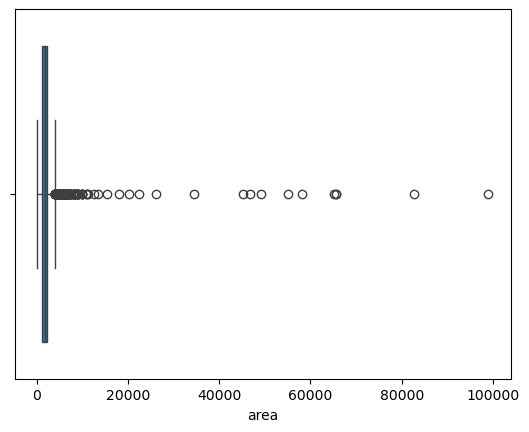

In [44]:
sns.boxplot(x=df['area'])

In [45]:
df[(df['area'] > 10000) & (df['price_per_sqft'] < 100)]

,sector,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,SuperBuiltUpArea,builtUpArea,carpetArea,others,pooja room,servant room,store room,study room,furnishing_type,luxury_score
71,sector 95,flat,ramsons kshitij,0.24,53.0,45283.02,Carpet area: 45966 (4270.38 sq.m.),2.0,2.0,1,10.0,North-West,Relatively New,NaN,NaN,45966.0,1,0,0,0,0,0,33
304,sector 95,flat,rof ananda,0.38,58.0,65517.24,Carpet area: 64412 (5984.07 sq.m.),3.0,2.0,1,12.0,North,Relatively New,NaN,NaN,64412.0,0,0,0,0,0,0,51
825,sector 95,flat,rof ananda,0.21,61.0,34426.23,Carpet area: 34401 (3195.96 sq.m.),1.0,1.0,1,13.0,North,Relatively New,NaN,NaN,34401.0,0,0,0,0,0,0,68
1287,sector 86,flat,pyramid elite,0.46,79.0,58227.85,Carpet area: 58141 (5401.48 sq.m.),2.0,2.0,1,0.0,NaN,Under Construction,NaN,NaN,58141.0,0,0,0,0,0,0,15
2711,sohna road,flat,signature the serenas,0.28,57.0,49122.81,Carpet area: 48811 (4534.69 sq.m.),1.0,1.0,2,1.0,North-West,Relatively New,NaN,NaN,48811.0,0,0,0,0,1,0,37
2948,sector 95,flat,rof ananda,0.33,60.0,55000.00,Carpet area: 54917 (5101.96 sq.m.),2.0,2.0,1,13.0,South-West,Relatively New,NaN,NaN,54917.0,0,0,0,0,0,0,37
3046,sector 95,flat,rof ananda,0.38,58.0,65517.24,Carpet area: 64529 (5994.94 sq.m.),2.0,2.0,2,10.0,East,New Property,NaN,NaN,64529.0,0,0,0,0,1,0,15


In [46]:
df[df['area'] > 10000]

,sector,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,SuperBuiltUpArea,builtUpArea,carpetArea,others,pooja room,servant room,store room,study room,furnishing_type,luxury_score
71,sector 95,flat,ramsons kshitij,0.24,53.0,45283.02,Carpet area: 45966 (4270.38 sq.m.),2.0,2.0,1,10.0,North-West,Relatively New,NaN,NaN,45966.0,1,0,0,0,0,0,33
304,sector 95,flat,rof ananda,0.38,58.0,65517.24,Carpet area: 64412 (5984.07 sq.m.),3.0,2.0,1,12.0,North,Relatively New,NaN,NaN,64412.0,0,0,0,0,0,0,51
326,sector 4,house,independent,0.85,630.0,13492.10,Plot area 1500(1254.19 sq.m.),3.0,3.0,1.0,1.0,North,Relatively New,NaN,13500.0,NaN,1,0,0,0,0,0,0
415,sushant lok,house,independent,27.50,24366.0,11286.20,Plot area 1254(1048.5 sq.m.),6.0,7.0,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,1,0,1,2,42
795,sector 88a,flat,godrej icon,1.75,1384.0,12644.51,Carpet area: 1175.11,3.0,3.0,3+,6.0,NaN,New Property,NaN,NaN,1175.0,0,0,0,0,0,0,55
825,sector 95,flat,rof ananda,0.21,61.0,34426.23,Carpet area: 34401 (3195.96 sq.m.),1.0,1.0,1,13.0,North,Relatively New,NaN,NaN,34401.0,0,0,0,0,0,0,68
842,sector 13,house,ganpati heights apartment,1.25,151.0,82781.50,Plot area 115(7692.86 sq.m.),10.0,6.0,2.0,3.0,South-East,Old Property,NaN,1035.0,NaN,1,0,0,0,0,0,7
958,sector 57,house,independent,6.25,2778.0,22498.20,Plot area 3100(2591.99 sq.m.)Built Up area: 26...,9.0,9.0,3+,3.0,North-East,New Property,NaN,2660.0,2500.0,0,0,1,0,0,2,61
1033,dlf phase,house,independent,7.30,1560.0,46794.90,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9.0,9.0,2.0,3.0,North-West,Relatively New,NaN,5800.0,5200.0,0,0,1,1,0,2,109
1044,sector 85,flat,godrej air,2.50,1379.0,18129.08,Carpet area: 18122 (1683.59 sq.m.),4.0,5.0,3+,16.0,North-East,Under Construction,NaN,NaN,18122.0,1,1,0,0,1,2,44


In [47]:
df.drop(index=df[(df['area'] > 10000) & (df['price_per_sqft'] < 100)].index, inplace=True)

In [48]:
df.shape

(3664, 23)

In [49]:
df[df['area'] > 10000]

,sector,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,SuperBuiltUpArea,builtUpArea,carpetArea,others,pooja room,servant room,store room,study room,furnishing_type,luxury_score
326,sector 4,house,independent,0.85,630.0,13492.10,Plot area 1500(1254.19 sq.m.),3.0,3.0,1.0,1.0,North,Relatively New,NaN,13500.0,NaN,1,0,0,0,0,0,0
415,sushant lok,house,independent,27.50,24366.0,11286.20,Plot area 1254(1048.5 sq.m.),6.0,7.0,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,1,0,1,2,42
795,sector 88a,flat,godrej icon,1.75,1384.0,12644.51,Carpet area: 1175.11,3.0,3.0,3+,6.0,NaN,New Property,NaN,NaN,1175.0,0,0,0,0,0,0,55
842,sector 13,house,ganpati heights apartment,1.25,151.0,82781.50,Plot area 115(7692.86 sq.m.),10.0,6.0,2.0,3.0,South-East,Old Property,NaN,1035.0,NaN,1,0,0,0,0,0,7
958,sector 57,house,independent,6.25,2778.0,22498.20,Plot area 3100(2591.99 sq.m.)Built Up area: 26...,9.0,9.0,3+,3.0,North-East,New Property,NaN,2660.0,2500.0,0,0,1,0,0,2,61
1033,dlf phase,house,independent,7.30,1560.0,46794.90,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9.0,9.0,2.0,3.0,North-West,Relatively New,NaN,5800.0,5200.0,0,0,1,1,0,2,109
1044,sector 85,flat,godrej air,2.50,1379.0,18129.08,Carpet area: 18122 (1683.59 sq.m.),4.0,5.0,3+,16.0,North-East,Under Construction,NaN,NaN,18122.0,1,1,0,0,1,2,44
2474,dlf phase,house,independent,18.40,1859.0,98977.90,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6.0,8.0,3+,4.0,South,Relatively New,NaN,NaN,11000.0,0,1,1,1,0,2,60
2722,sector 3,house,independent,1.45,557.0,26032.30,Plot area 26000(2415.48 sq.m.),4.0,4.0,2.0,2.0,East,Moderately Old,NaN,234000.0,NaN,0,1,1,0,0,0,62
2814,dlf phase,house,dlf city plot phase 4,13.00,1992.0,65261.00,Carpet area: 7250 (6061.92 sq.m.),10.0,10.0,3+,1.0,NaN,Undefined,NaN,NaN,7250.0,0,0,0,0,0,0,0


In [50]:
df[df['area'] > 10000] \
    .apply(lambda x: x['carpetArea'] if pd.notnull(x['carpetArea']) 
    else x['builtUpArea'] if pd.notnull(x['builtUpArea']) 
    else x['SuperBuiltUpArea'], axis=1)

326      13500.0
415      11286.0
795       1175.0
842       1035.0
958       2500.0
1033      5200.0
1044     18122.0
2474     11000.0
2722    234000.0
2814      7250.0
3011      3500.0
3740      1720.0
3757     11000.0
3829      2250.0
dtype: float64

In [51]:
df.loc[df['area'] > 10000, 'area'] \
     = (df[df['area'] > 10000] \
    .apply(lambda x: x['carpetArea'] if pd.notnull(x['carpetArea']) 
    else x['builtUpArea'] if pd.notnull(x['builtUpArea']) 
    else x['SuperBuiltUpArea'], axis=1)).values

In [102]:
df = df[df['area'] < 12000]

In [104]:
df['area'].describe()

count     3661.000000
mean      1945.860606
std       1213.802127
min        145.000000
25%       1254.860000
50%       1744.190000
75%       2324.040000
max      11286.000000
Name: area, dtype: float64

<Axes: xlabel='area', ylabel='Count'>

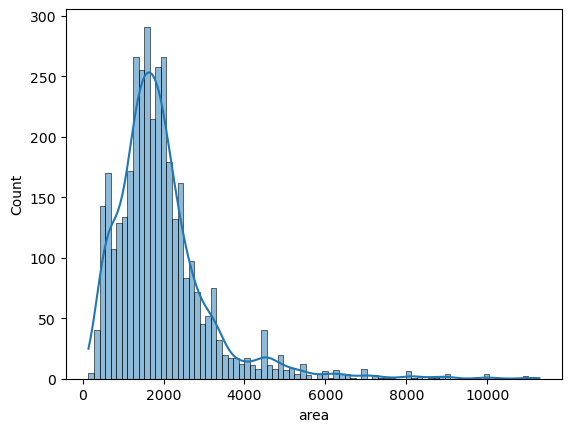

In [106]:
sns.histplot(df['area'], kde=True)

<Axes: xlabel='area'>

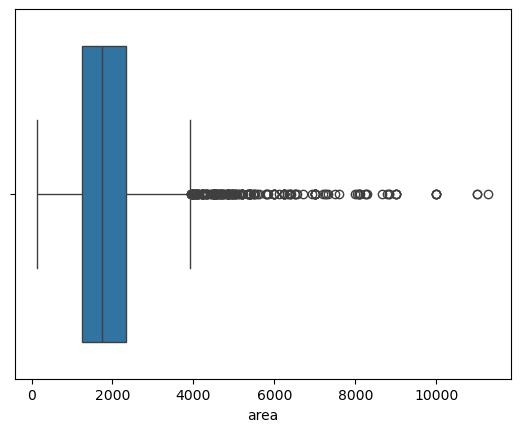

In [108]:
sns.boxplot(x=df['area'])

# BedRoom

<Axes: xlabel='bedRoom', ylabel='Count'>

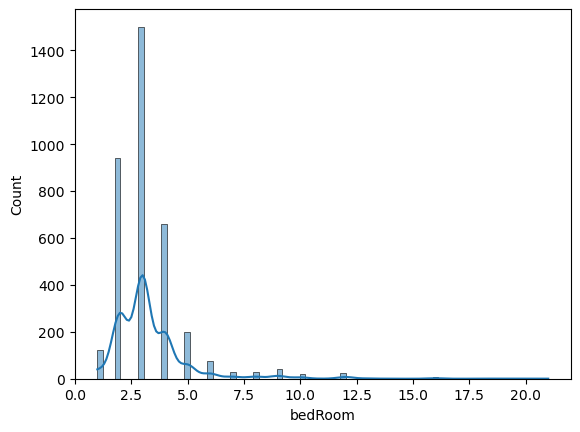

In [111]:
sns.histplot(x=df['bedRoom'], kde=True)

<Axes: xlabel='bedRoom'>

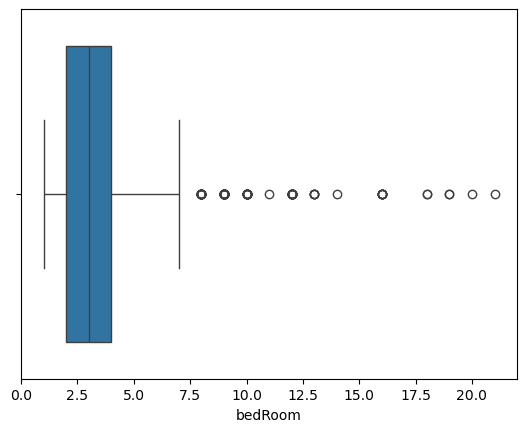

In [112]:
sns.boxplot(x=df['bedRoom'])

In [114]:
Q1 = df['bedRoom'].quantile(0.25)
Q3 = df['bedRoom'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR

In [117]:
df[(df['bedRoom'] > Q3) | (df['bedRoom'] < Q1)]

,sector,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,SuperBuiltUpArea,builtUpArea,carpetArea,others,pooja room,servant room,store room,study room,furnishing_type,luxury_score
1,sector 109,house,international city by sobha phase 1,6.10,25103.0,2430.0,Plot area 270(225.75 sq.m.),5.0,6.0,3+,2.0,NaN,Moderately Old,NaN,2430.0,NaN,0,0,1,0,0,0,30
12,sector 49,house,uppal southend,4.40,15278.0,2880.0,Plot area 320(267.56 sq.m.),6.0,6.0,3.0,3.0,North,Moderately Old,NaN,2880.0,NaN,0,1,1,1,1,1,110
22,sushant lok,house,independent,2.50,2885.0,8667.0,Plot area 107(89.47 sq.m.),7.0,7.0,3.0,4.0,West,Relatively New,NaN,963.0,NaN,1,0,0,0,0,2,20
23,sector 23,house,independent,2.70,18620.0,1450.1,Plot area 1450(134.71 sq.m.),5.0,5.0,2.0,3.0,East,Old Property,NaN,1450.0,NaN,0,0,0,0,0,2,17
42,sector 52,house,raj villas,8.00,25543.0,3132.0,Carpet area: 348 (290.97 sq.m.),6.0,5.0,3+,4.0,East,Undefined,NaN,NaN,348.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3814,sector 48,house,eldeco mansionz,5.00,21367.0,2340.1,Plot area 260(217.39 sq.m.),7.0,7.0,3.0,2.0,North-East,Moderately Old,NaN,2340.0,NaN,0,0,0,0,0,2,40
3826,sector 6,house,independent,1.25,11574.0,1080.0,Plot area 120(100.34 sq.m.)Built Up area: 120 ...,5.0,5.0,1.0,2.0,South,New Property,NaN,120.0,NaN,0,1,0,0,0,0,0
3829,sushant lok,house,independent,5.50,2716.0,2250.0,Plot area 215(179.77 sq.m.)Built Up area: 2850...,8.0,7.0,3+,3.0,East,Moderately Old,NaN,2850.0,2250.0,1,1,1,0,1,2,123
3843,sector 12,house,project mianwali colony,2.00,14815.0,1350.0,Built Up area: 1350 (125.42 sq.m.),5.0,5.0,2.0,3.0,East,Undefined,NaN,1350.0,NaN,0,0,0,0,0,0,0


In [119]:
df = df[df['bedRoom'] < 10]

<Axes: xlabel='bedRoom'>

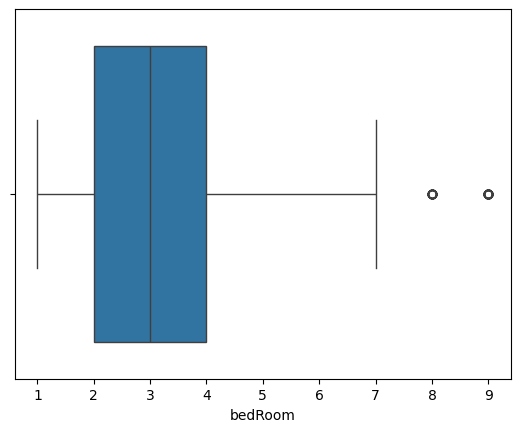

In [121]:
sns.boxplot(x=df['bedRoom'])

<Axes: xlabel='luxury_score', ylabel='Count'>

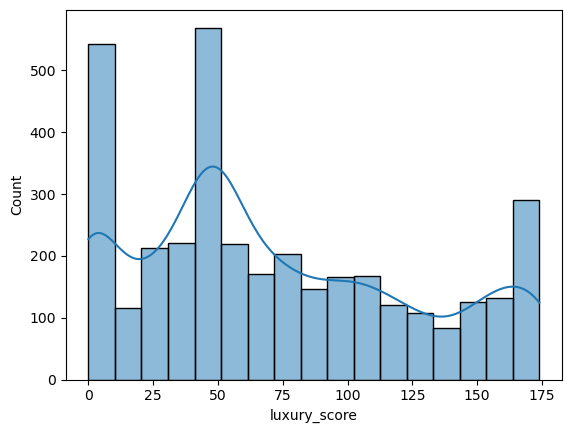

In [123]:
sns.histplot(df['luxury_score'], kde=True)

<Axes: xlabel='luxury_score'>

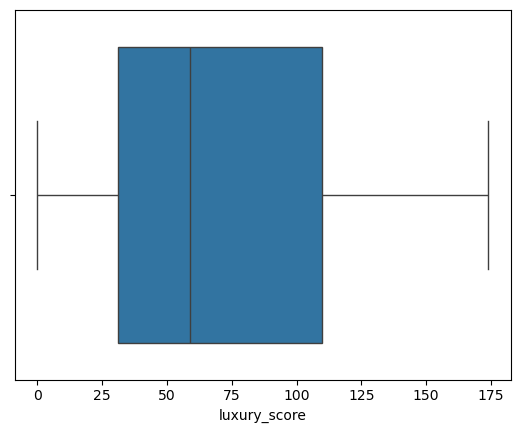

In [124]:
sns.boxplot(x=df['luxury_score'])

In [126]:
df['luxury_score'].describe()

count    3596.000000
mean       71.776418
std        53.233378
min         0.000000
25%        31.000000
50%        59.000000
75%       110.000000
max       174.000000
Name: luxury_score, dtype: float64

In [129]:
(df['area'] / df['bedRoom']).quantile(0.05)

247.54000000000002

In [131]:
df['area_to_bedroom'] =  df['area'] / df['bedRoom']

In [133]:
outliers_df = df[(df['area_to_bedroom'] < 250) & (df['bedRoom'] > 3)]

In [135]:
outliers_df['bedRoom'] = round(outliers_df['bedRoom'] / outliers_df['floorNum'])

/var/folders/xh/dlr59jp10wj5hx57q_rhfy3c0000gn/T/ipykernel_64828/1649205732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_df['bedRoom'] = round(outliers_df['bedRoom'] / outliers_df['floorNum'])


In [137]:
df.update(outliers_df)

In [139]:
df['area_to_bedroom'] = df['area'] / df['bedRoom']

In [141]:
df[(df['area_to_bedroom'] < 250) & (df['bedRoom'] > 3)]

,sector,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,SuperBuiltUpArea,builtUpArea,carpetArea,others,pooja room,servant room,store room,study room,furnishing_type,luxury_score,area_to_bedroom
225,manesar,house,independent,1.10,6172.0,1782.2,Plot area 1782(165.55 sq.m.),8.0,8.0,0,1.0,NaN,New Property,NaN,1782.0,NaN,0,0,0,0,0,0,0,222.775000
646,sector 2,house,independent,0.98,9074.0,1080.0,Carpet area: 120 (100.34 sq.m.),9.0,4.0,3.0,1.0,South,Undefined,NaN,NaN,120.0,0,0,0,0,0,0,0,120.000000
696,sector 6,house,surendra homes dayanand colony,0.75,15625.0,480.0,Built Up area: 480 (44.59 sq.m.),4.0,4.0,2.0,1.0,NaN,Undefined,NaN,480.0,NaN,0,0,0,0,0,0,0,120.000000
703,sector 3,house,independent,1.10,10000.0,1100.0,Built Up area: 1100 (102.19 sq.m.)Carpet area:...,5.0,4.0,2.0,1.0,East,Undefined,NaN,1100.0,900.0,0,0,0,0,0,0,0,220.000000
1003,sector 4,house,independent,0.50,10482.0,477.0,Built Up area: 53 (44.31 sq.m.),5.0,3.0,0,1.0,NaN,Undefined,NaN,53.0,NaN,0,0,0,0,0,0,0,95.400000
1493,sector 3,house,independent,0.85,9444.0,900.0,Carpet area: 900 (83.61 sq.m.),5.0,3.0,3.0,1.0,NaN,Undefined,NaN,NaN,900.0,0,0,0,0,0,0,0,180.000000
1608,sector 7,house,independent,1.16,11717.0,990.0,Carpet area: 110 (91.97 sq.m.),5.0,4.0,2.0,1.0,North-East,Undefined,NaN,NaN,110.0,0,0,0,0,0,0,0,198.000000
1728,sector 12,house,independent,2.50,13888.0,1800.1,Plot area 1800(167.23 sq.m.),9.0,5.0,2.0,1.0,South-East,Old Property,NaN,1800.0,NaN,0,1,0,0,0,0,8,200.011111
1854,sector 6,house,"bhim nagar, sector 6",0.85,14096.0,603.0,Plot area 67(6.22 sq.m.),5.0,2.0,2.0,1.0,NaN,Old Property,NaN,67.0,NaN,0,1,0,0,0,0,29,120.600000
1984,sector 105,house,independent,1.20,13333.0,900.0,Plot area 900(83.61 sq.m.),4.0,4.0,1.0,2.0,South-West,Moderately Old,NaN,900.0,NaN,1,0,0,0,0,0,14,225.000000


In [151]:
df = df[~((df['area_to_bedroom'] < 250) & (df['bedRoom'] > 3))]

In [153]:
df

,sector,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,SuperBuiltUpArea,builtUpArea,carpetArea,others,pooja room,servant room,store room,study room,furnishing_type,luxury_score,area_to_bedroom
0,sector 49,flat,orchid petals,2.45,11887.0,2061.08,Super Built up area 2061(191.47 sq.m.),3.0,3.0,3,0.0,North-East,Relatively New,2061.0,NaN,NaN,0,0,0,0,1,0,49,687.026667
1,sector 109,house,international city by sobha phase 1,6.10,25103.0,2430.00,Plot area 270(225.75 sq.m.),5.0,6.0,3+,2.0,NaN,Moderately Old,NaN,2430.0,NaN,0,0,1,0,0,0,30,486.000000
2,sector 1,flat,sonata group housing gh 24,1.65,5892.0,2800.41,Carpet area: 2800 (260.13 sq.m.),4.0,3.0,3,8.0,NaN,New Property,NaN,NaN,2800.0,0,0,1,0,0,0,20,700.102500
3,sector 7,house,independent,0.66,12000.0,550.00,Plot area 550(51.1 sq.m.),3.0,1.0,1.0,3.0,East,Relatively New,NaN,550.0,NaN,1,0,0,0,0,0,22,183.333333
4,sector 37d,flat,bptp terra,1.40,7730.0,1811.13,Super Built up area 1811(168.25 sq.m.)Built Up...,3.0,3.0,3,5.0,South-East,Relatively New,1811.0,1711.0,1611.0,0,0,0,0,0,2,149,603.710000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3860,sohna road,flat,gls arawali homes,0.32,6722.0,476.05,Built Up area: 476 (44.22 sq.m.),2.0,1.0,0,0.0,NaN,Undefined,NaN,476.0,NaN,0,0,0,0,0,0,0,238.025000
3861,surat nagar,house,independent,0.71,10142.0,700.10,Plot area 700(65.03 sq.m.),2.0,2.0,1.0,2.0,NaN,New Property,NaN,700.0,NaN,0,0,0,0,0,0,0,350.050000
3862,sector 79,flat,bestech altura,1.85,8604.0,2150.16,Super Built up area 2150(199.74 sq.m.)Built Up...,3.0,3.0,3,7.0,NaN,New Property,2150.0,1650.0,1350.0,0,0,1,0,0,0,53,716.720000
3863,sector 103,flat,satya the hermitage,0.93,6404.0,1452.22,Carpet area: 1452 (134.9 sq.m.),2.0,3.0,3,3.0,East,Relatively New,NaN,NaN,1452.0,0,0,1,0,0,2,90,726.110000


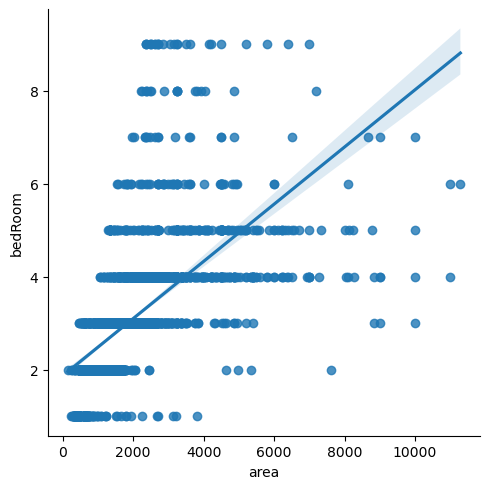

In [155]:
sns.lmplot(data=df, x = 'area', y='bedRoom')

In [158]:
df.to_csv('gurgaon_properties_outlier_treated.csv', index=False)